In [1]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
#reading the data and creating data set
loan_data = pd.read_csv("loan.csv")

In [3]:
#viewing the top columns of the data
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#viewing the shape of the data
loan_data.shape

(39717, 111)

In [5]:
#checking for null columns
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

#### It is Noticed that there are a lot of columns with only Null values, we will remove them first

In [6]:
#dropping null values
loan_data.dropna(axis = 1, how = 'all', inplace = True)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


#### There are also some columns with only one value for all ids which will not contribute for better analysis, hence removing them 

In [7]:
#Finding number of unique values in each column
loan_data.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
pymnt_plan                        1
initial_list_status               1
term                              2
next_pymnt_d                      2
pub_rec_bankruptcies              3
loan_status                       3
verification_status               3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                

In [8]:
#Dropping Columns with only one values.
loan_data.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,0.0


#### There are few more columns we can remove that have unique responses throughout the data

In [9]:
#Finding number of unique values, printing high unique valued columns
loan_data.nunique().sort_values(ascending=False)

id                          39717
url                         39717
member_id                   39717
total_pymnt                 37850
total_pymnt_inv             37518
total_rec_int               35148
last_pymnt_amnt             34930
emp_title                   28820
desc                        26527
revol_bal                   21711
title                       19615
installment                 15383
funded_amnt_inv              8205
total_rec_prncp              7976
annual_inc                   5318
recoveries                   4040
dti                          2868
collection_recovery_fee      2616
total_rec_late_fee           1356
out_prncp_inv                1138
out_prncp                    1137
revol_util                   1089
funded_amnt                  1041
loan_amnt                     885
zip_code                      823
earliest_cr_line              526
int_rate                      371
mths_since_last_record        111
last_credit_pull_d            106
last_pymnt_d  

In [10]:
#Dropping few more columns which would be irrelevant or not needed to the business objective for the goal of analysis
loan_data.drop(["id","url", "title", "emp_title", "zip_code", "last_credit_pull_d", "desc","out_prncp_inv","total_pymnt_inv",  "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)

In [11]:
#viewing the new shape of the data
loan_data.shape

(39717, 26)

In [12]:
#checking the different columns in the data
loan_data.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

#### Now we are left with 26 columns

### Our aim is to analyse the given data to understand why does an individual gets default/charged-off 



 #### We cannot use the loans currently active to analzye the data for defaulters, so we will exclude the data of active loans from the data set

In [13]:
#Removing the data where the loans are still ongoing
loan_data = loan_data[loan_data.loan_status != "Current"]
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

#### Now checking for missing values

In [14]:
#Checking percentage of missing values
((loan_data.isna().sum()/len(loan_data.index))*100).sort_values(
    ascending=False)

emp_length              2.677761
pub_rec_bankruptcies    1.806776
revol_util              0.129611
loan_status             0.000000
total_acc               0.000000
pub_rec                 0.000000
open_acc                0.000000
inq_last_6mths          0.000000
earliest_cr_line        0.000000
delinq_2yrs             0.000000
dti                     0.000000
addr_state              0.000000
purpose                 0.000000
member_id               0.000000
loan_amnt               0.000000
verification_status     0.000000
annual_inc              0.000000
home_ownership          0.000000
sub_grade               0.000000
grade                   0.000000
installment             0.000000
int_rate                0.000000
term                    0.000000
funded_amnt_inv         0.000000
funded_amnt             0.000000
issue_d                 0.000000
dtype: float64

## Handling Missing values
 - columns with missing values are "emp_length", "pub_rec_bankruptcies", and  "revol_util". 
 - So before doing that, lets see what kind of data each column has. 

In [15]:
#viewing the datatype of the columns
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   member_id             38577 non-null  int64  
 1   loan_amnt             38577 non-null  int64  
 2   funded_amnt           38577 non-null  int64  
 3   funded_amnt_inv       38577 non-null  float64
 4   term                  38577 non-null  object 
 5   int_rate              38577 non-null  object 
 6   installment           38577 non-null  float64
 7   grade                 38577 non-null  object 
 8   sub_grade             38577 non-null  object 
 9   emp_length            37544 non-null  object 
 10  home_ownership        38577 non-null  object 
 11  annual_inc            38577 non-null  float64
 12  verification_status   38577 non-null  object 
 13  issue_d               38577 non-null  object 
 14  loan_status           38577 non-null  object 
 15  purpose            

### The above counts shows that the mode value has far higher frequency than that of the next most frequent value. 
- This means that we can safely assign the value of mode to the null values in the column.
- Also the missing values are in very low percentage. So imputung with mode value doesnt affect the analysis much.

In [16]:
#Dropping Null values of emp_length
loan_data.dropna(subset=['emp_length'], inplace=True)
#Finding percentage of null or missing values
null_perc = round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2)
null_perc[ null_perc > 0 ]

revol_util              0.13
pub_rec_bankruptcies    1.86
dtype: float64

In [17]:
# pub_rec_bankruptcies can be cleaned for further analysis.
loan_data.pub_rec_bankruptcies.fillna('Not Known',inplace=True)
print(loan_data.pub_rec_bankruptcies.isnull().sum())

0


In [18]:
#now converting emp_length to have only numbers
loan_data['emp_length'] = loan_data['emp_length'].str.rstrip('years ')
loan_data['emp_length'].replace({'10+': '10'}, inplace=True)
loan_data['emp_length'][loan_data['emp_length'] == '< 1'] = '0.5'
loan_data.head(2)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10,...,AZ,27.65,0,Jan-85,1,3,0,83.70%,9,0.0
1,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,0.5,...,GA,1.00,0,Apr-99,5,3,0,9.40%,4,0.0


In [19]:
# Lets remove % symbol from "int_rate" and "revol_util" column so that it can be used in calculations
loan_data['int_rate'] = loan_data['int_rate'].str.rstrip('%')
loan_data['int_rate'] = loan_data['int_rate'].astype(np.float)
loan_data['revol_util'] = loan_data['revol_util'].str.rstrip('%')
loan_data['revol_util']  = loan_data['revol_util'].astype(np.float)

In [20]:
#adding new columns for month and year
loan_data['issue_d_month'], loan_data['issue_d_year'] = loan_data['issue_d'].str.split('-').str

In [21]:
loan_data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,issue_d_month,issue_d_year
0,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,...,0,Jan-85,1,3,0,83.7,9,0.0,Dec,11
1,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0.5,...,0,Apr-99,5,3,0,9.4,4,0.0,Dec,11
2,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,...,0,Nov-01,2,2,0,98.5,10,0.0,Dec,11
3,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,...,0,Feb-96,1,10,0,21.0,37,0.0,Dec,11
5,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,...,0,Nov-04,3,9,0,28.3,12,0.0,Dec,11


### Outlier Data Treatment

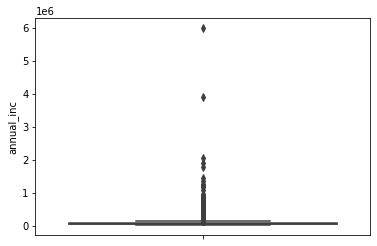

In [22]:
#boxplot of annual_inc
sns.boxplot(y=loan_data['annual_inc'])
plt.show()

In [23]:
#removing the top 5 percentile of data for annual income considering them as outliers
per_95_annual_inc = loan_data['annual_inc'].quantile(0.95)
loan_data = loan_data[loan_data.annual_inc <= per_95_annual_inc]

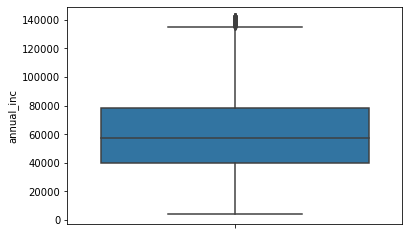

In [24]:
#boxplot of annual_inc after cleaning
sns.boxplot(y=loan_data['annual_inc'])
plt.show()

Now the "annual_inc" data looks good and proceeding next. Let's look at some other numerical variables which could possibly have  outliers like
  -  dti - The ratio of the borrowers' debt obligation to the borrowers income
  -  loan_amnt
  -  funded_amnt_inv

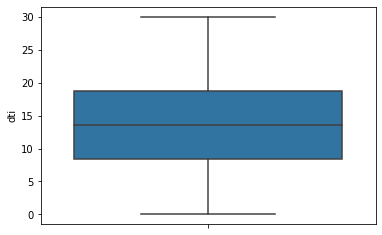

In [25]:
#boxplot of dti
sns.boxplot(y=loan_data.dti)
plt.show()

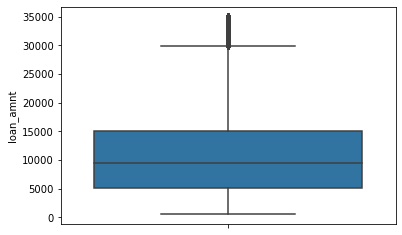

In [26]:
#boxplot of loan_amnt
sns.boxplot(y=loan_data.loan_amnt)
plt.show()

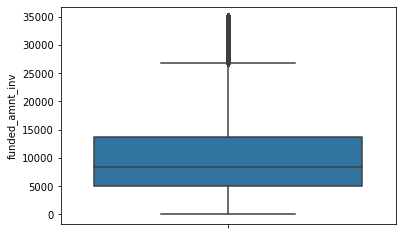

In [27]:
#boxplot of funded_amnt_inv
sns.boxplot(y=loan_data.funded_amnt_inv)
plt.show()

#### Though there are some outliers for these columns we are not considering them as outliers as there is a small difference between the box plot fence and the outliers

## Univariate Analysis

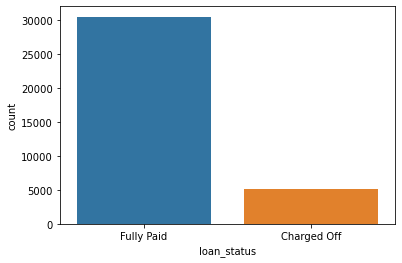

In [28]:
#plot of loan_status
sns.countplot(x = 'loan_status', data = loan_data)
plt.show()

**Inference:** 
1. Most of the loans are Fully Paid. 
2. About 5000 (14%) loans are having status as defaulters.

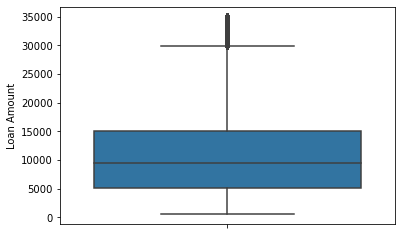

In [29]:
#plot of loan_amnt
sns.boxplot(y=loan_data["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

##### **Inference:** The loan amount varies from 0 to 35,000 having mean of 10,000

In [30]:
#converting subgrade to numeric to have a better analysis between the grades
loan_data.sub_grade = pd.to_numeric(loan_data.sub_grade.apply(lambda x : x[-1]))
loan_data.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

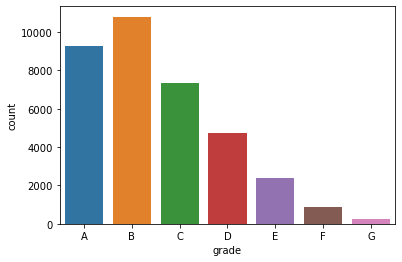

In [31]:
#plot of grade
sns.countplot(x = 'grade', data = loan_data, order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

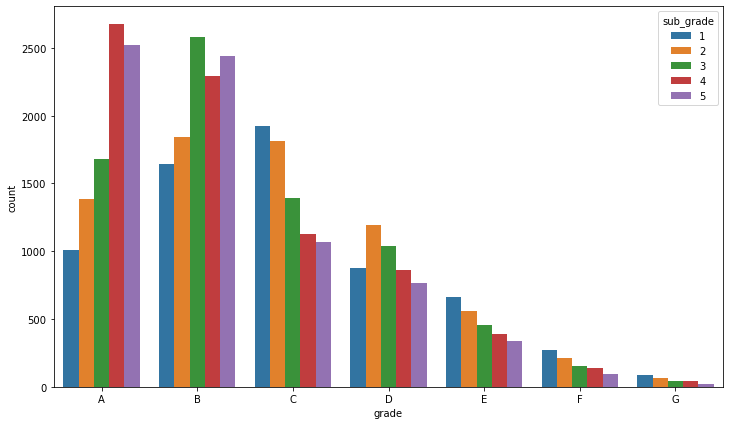

In [32]:
#plot of grade and subgrade
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_data)
plt.show()

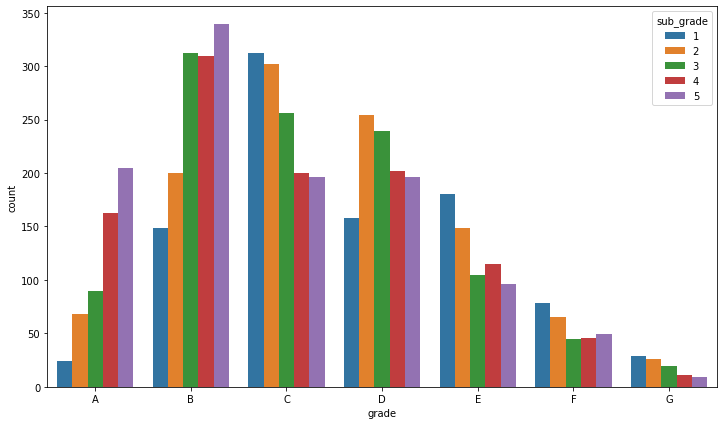

In [33]:
#plot of grade and subgrade for charged off
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_data[loan_data.loan_status == 'Charged Off'])
plt.show()

##### **Inference:** Most of the loans are of grade A and B with  grade 'B5' being the most number of loans being charged off (defaulters)

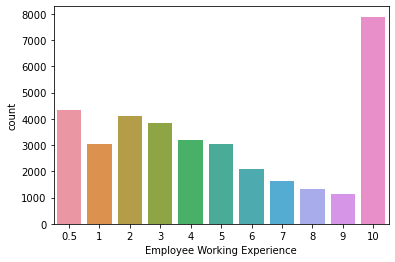

In [34]:
#plot of emp_length
sns.countplot(x='emp_length', data=loan_data, order = ['0.5','1','2','3','4','5','6','7','8','9','10'])
plt.xlabel('Employee Working Experience')
plt.show()

##### **Inference:** Most of the loans taken by employees who have 10 years experience or more

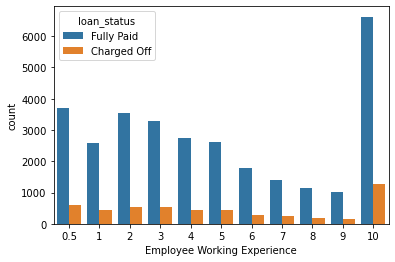

In [35]:
#plot of employee working experience and loan_status
sns.color_palette()
sns.countplot(x='emp_length', hue='loan_status', data=loan_data, order = ['0.5','1','2','3','4','5','6','7','8','9','10'])
plt.xlabel('Employee Working Experience')
plt.show()

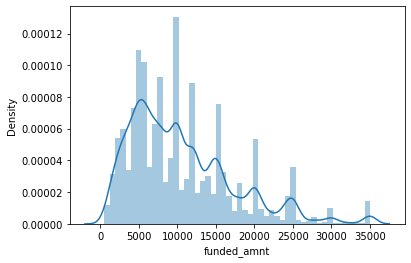

In [36]:
#plot of funded_amnt
sns.distplot(loan_data['funded_amnt'])
plt.show()

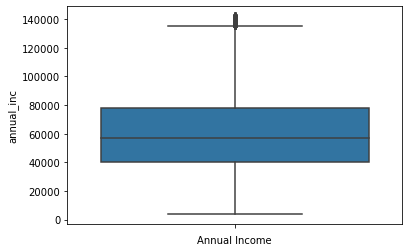

In [37]:
#plot of annual_inc
sns.boxplot(y=loan_data['annual_inc'])
plt.xlabel('Annual Income')
plt.show()

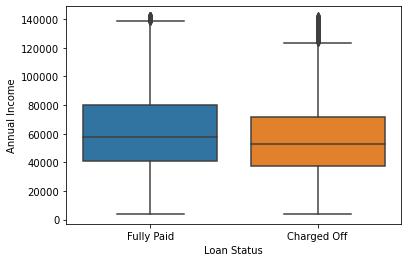

In [38]:
sns.boxplot(y='annual_inc', x='loan_status', data=loan_data)
plt.ylabel('Annual Income')
plt.xlabel('Loan Status')
plt.show()

**Inference:** Most of the income of the applicants is between 40 thousand and 80 thousand

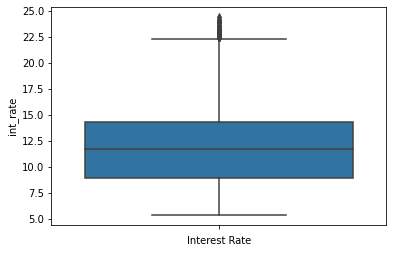

In [39]:
#plot of int_rate
sns.boxplot(y=loan_data['int_rate'])
plt.xlabel('Interest Rate')
plt.show()

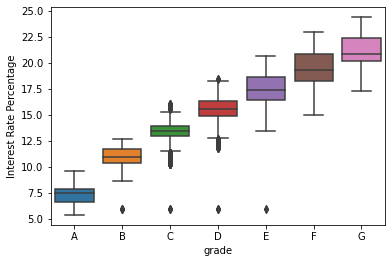

In [40]:
#plot of int_rate and grade
sns.boxplot(y='int_rate', x='grade', data=loan_data, order=['A','B','C','D','E','F','G'])
plt.ylabel('Interest Rate Percentage')
plt.show()

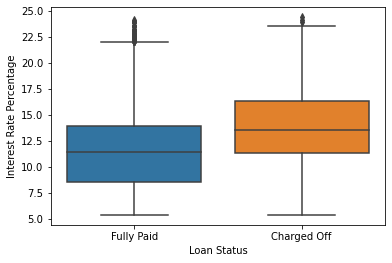

In [41]:
sns.boxplot(y='int_rate', x='loan_status', data=loan_data)
plt.ylabel('Interest Rate Percentage')
plt.xlabel('Loan Status')
plt.show()

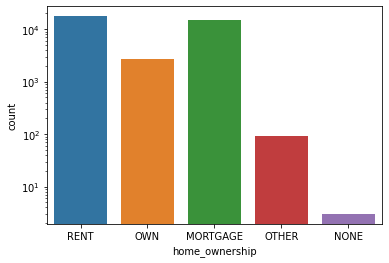

In [42]:
#plot of home_ownership
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan_data)
plt.show()

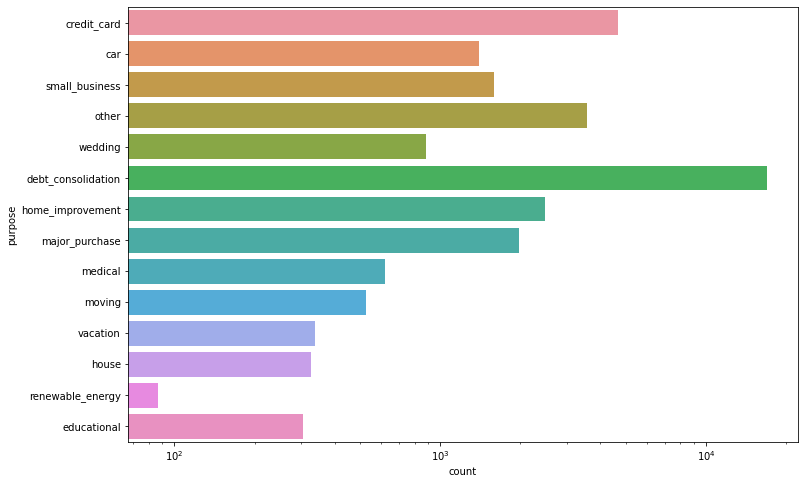

In [43]:
#plot of purpose
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan_data)
plt.show()

#### Creating bins for some variables to analyze them better 

In [44]:
#creating bins for int_rate,open_acc,revol_util,total_acc
loan_data['int_rate_bin'] = pd.cut(loan_data['int_rate'], bins=19,precision =0,labels=['5%-6%','6%-7%','7%-8%','8%-9%','9%-10%','10%-11%','11%-12%','12%-13%','13%-14%','14%-15%','15%-16%','16%-17%','17%-18%','18%-19%','19%-20%','20%-21%','21%-22%','22%-23%','23%-24%'])
loan_data['open_acc_groups'] = pd.cut(loan_data['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan_data['revol_util_groups'] = pd.cut(loan_data['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan_data['total_acc_groups'] = pd.cut(loan_data['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan_data['annual_inc_groups'] = pd.cut(loan_data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
loan_data['loan_inc_ratio'] = loan_data.funded_amnt_inv*100/loan_data.annual_inc

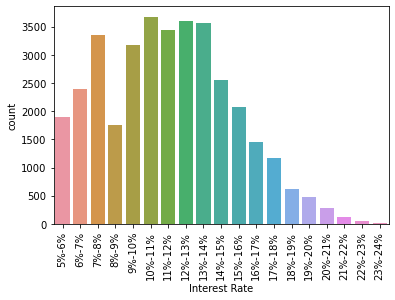

In [45]:
#plot of int_rate_groups
sns.countplot(x='int_rate_bin', data=loan_data)
plt.xlabel('Interest Rate')
plt.xticks(rotation=90)
plt.show()

In [46]:
# Viewing new bins created
loan_data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_acc,pub_rec_bankruptcies,issue_d_month,issue_d_year,int_rate_bin,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups,loan_inc_ratio
0,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,2,10,...,9,0.0,Dec,11,10%-11%,2-10,80-100,2-20,3k-31k,20.729167
1,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,4,0.5,...,4,0.0,Dec,11,14%-15%,2-10,0-20,2-20,3k-31k,8.333333
2,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,5,10,...,10,0.0,Dec,11,15%-16%,2-10,80-100,2-20,3k-31k,19.588639
3,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,1,10,...,37,0.0,Dec,11,13%-14%,2-10,20-40,20-37,31k-58k,20.325203
5,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,4,3,...,12,0.0,Dec,11,7%-8%,2-10,20-40,2-20,31k-58k,13.888889


In [47]:
#creating larger bins for interest rates
loan_data['int_rate_groups'] = pd.cut(loan_data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])

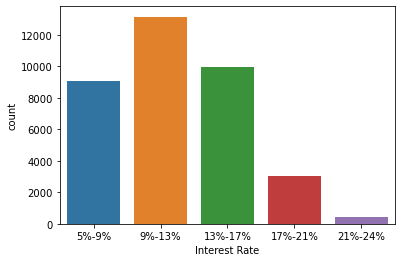

In [48]:
#plot of int_rate_groups
sns.countplot(x='int_rate_groups', data=loan_data)
plt.xlabel('Interest Rate')
plt.show()

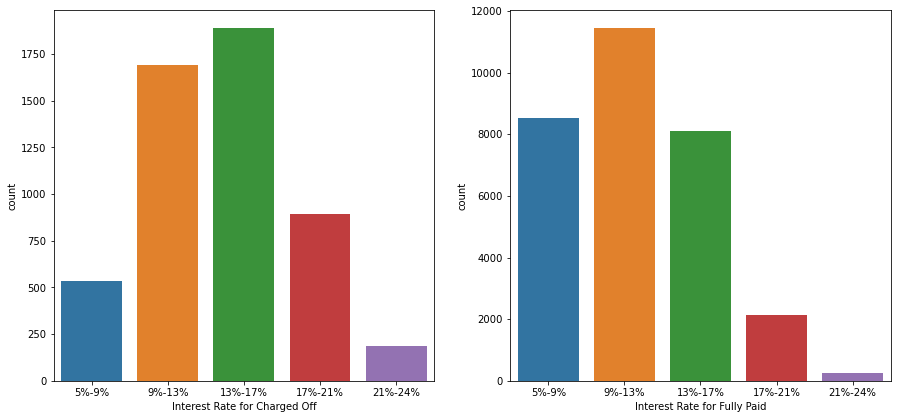

In [49]:
#plot of int_rate_groups for charged off
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate for Charged Off')
plt.subplot(222)
sns.countplot(x='int_rate_groups', data=loan_data[loan_data.loan_status == 'Fully Paid'])
plt.xlabel('Interest Rate for Fully Paid')
plt.show()

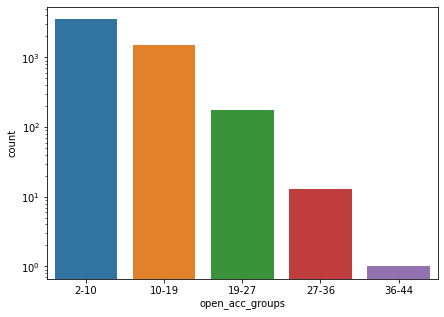

In [50]:
#plot of open_acc_groups
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='open_acc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.show()

## Segmented Univariate Analysis

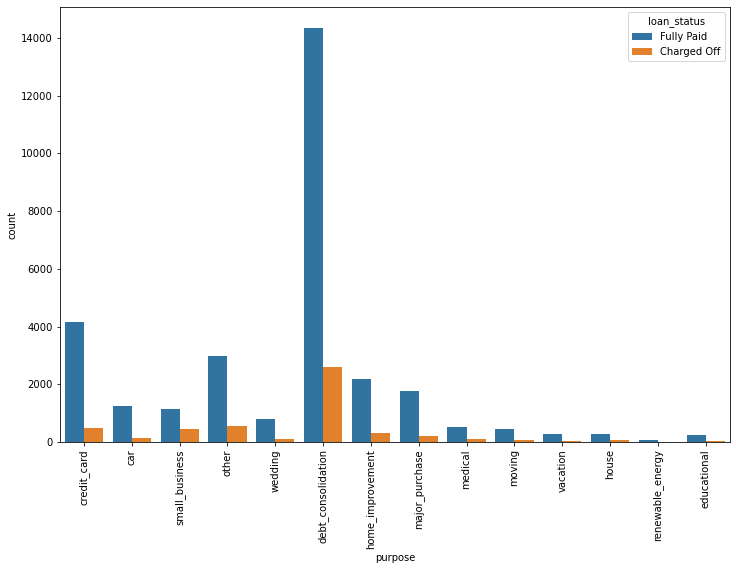

In [51]:
#plot of purpose and loan_status
fig, ax = plt.subplots(figsize = (12,8))
sns.countplot(x='purpose', hue="loan_status", data=loan_data)
plt.xticks(rotation=90)
plt.show()

**Inference:** Majority of loan has been given for the debt consolidation purpose and has been fully paid.

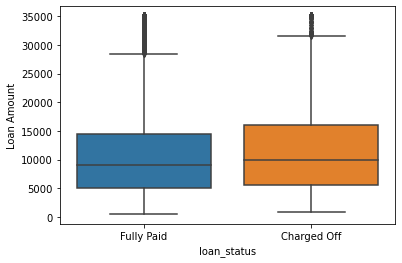

In [52]:
#plot of loan_amnt and loan_status
sns.boxplot( y="loan_amnt", x='loan_status' , data=loan_data)
plt.ylabel('Loan Amount')
plt.show()

#### Inference: Mean, 25% and 75% Loan amount of Fully paid and charged off is almost the same

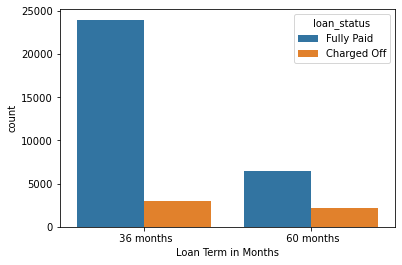

In [53]:
#plot of term and loan_status
sns.countplot( x="term", hue='loan_status', data=loan_data)
plt.xlabel('Loan Term in Months')
plt.show()

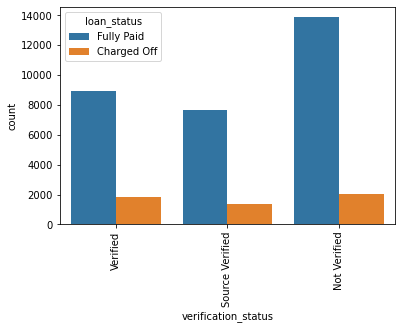

In [54]:
#plot of verification_status and loan_status
sns.countplot(x='verification_status',hue='loan_status', data=loan_data)
plt.xticks(rotation=90)
plt.show()

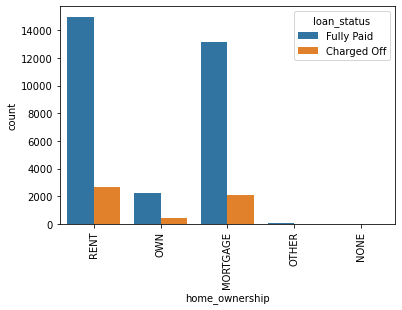

In [55]:
#plot of home_ownership and loan_status
sns.countplot(x='home_ownership',hue='loan_status', data=loan_data)
plt.xticks(rotation=90)
plt.show()

## Bivariate Plots

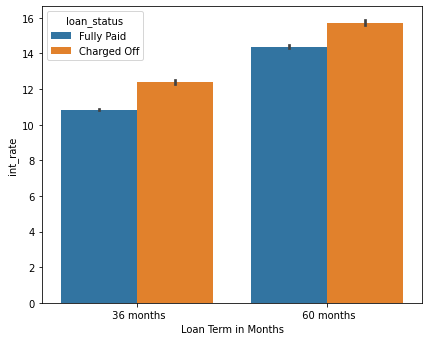

In [56]:
#plot of term and int_rate
fig, ax = plt.subplots(figsize = (15,12))
plt.subplot(221)
sns.barplot(x='term',y='int_rate',hue='loan_status',data=loan_data)
plt.xlabel('Loan Term in Months')
plt.show()

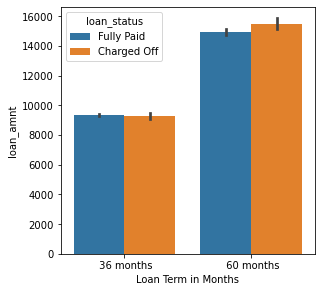

In [57]:
#plot of term and loan_amnt
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.barplot(x='term',y='loan_amnt',hue='loan_status',data=loan_data)
plt.xlabel('Loan Term in Months')
plt.show()

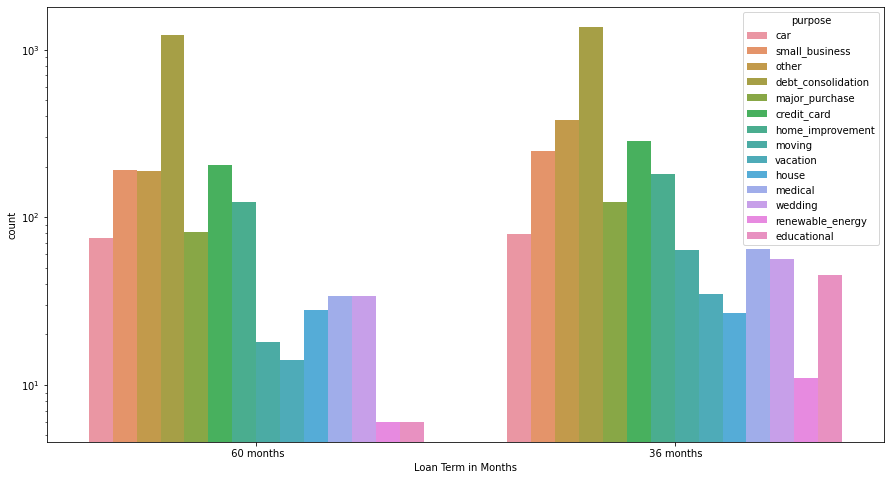

In [58]:
#plot of term and purpose
fig, ax = plt.subplots(figsize = (15,8)) 
ax.set(yscale = 'log')
sns.countplot( x="term", hue='purpose', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.xlabel('Loan Term in Months')
plt.show()

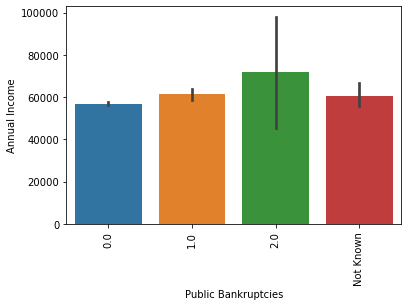

In [59]:
#plot of annual_inc and pub_rec_bankruptcies
sns.barplot(y='annual_inc', x='pub_rec_bankruptcies', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.xticks(rotation=90)
plt.xlabel('Public Bankruptcies')
plt.ylabel('Annual Income')
plt.show()

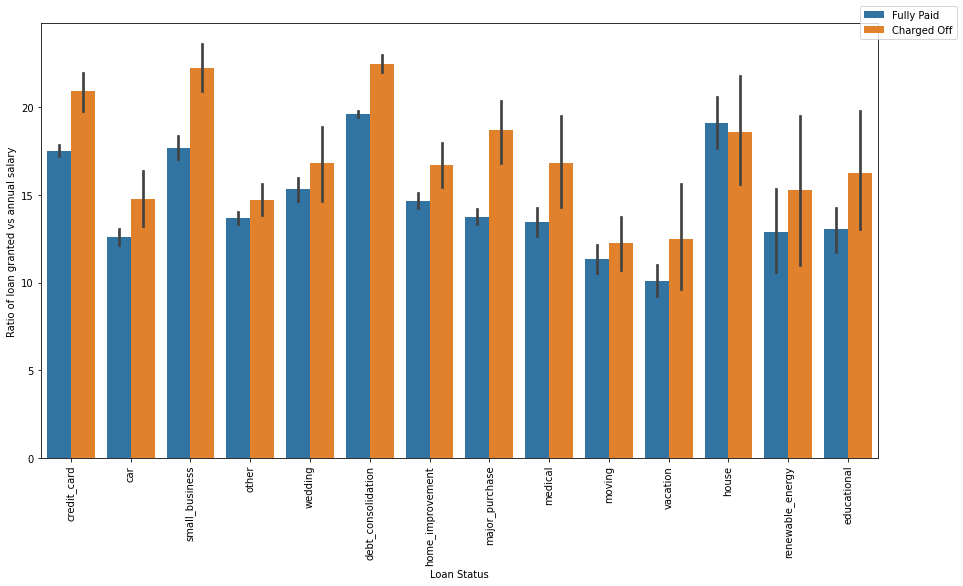

In [60]:
#plot of loan_inc_ratio and purpose
fig, ax = plt.subplots(figsize = (15,8))
sns.barplot(x='purpose',y='loan_inc_ratio',hue='loan_status',data=loan_data)
plt.xticks(rotation=90)
#sns.lineplot(data =loan_data,y='loan_inc_ratio', x='issue_d_month', hue ='loan_status')
plt.xlabel('Loan Status')
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.ylabel('Ratio of loan granted vs annual salary')
plt.show()

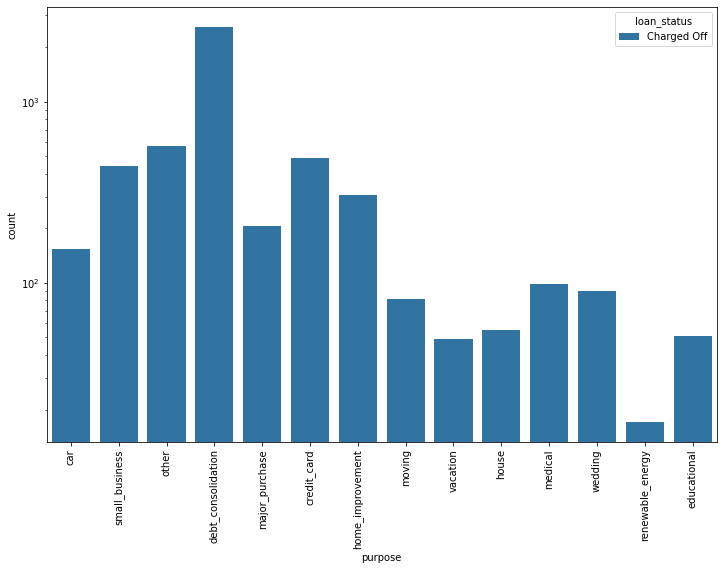

In [61]:
#plot of purpose and loan_status
fig, ax = plt.subplots(figsize = (12,8))
ax.set(yscale = 'log')
sns.countplot(x='purpose', hue="loan_status", data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.xticks(rotation=90)
plt.show()

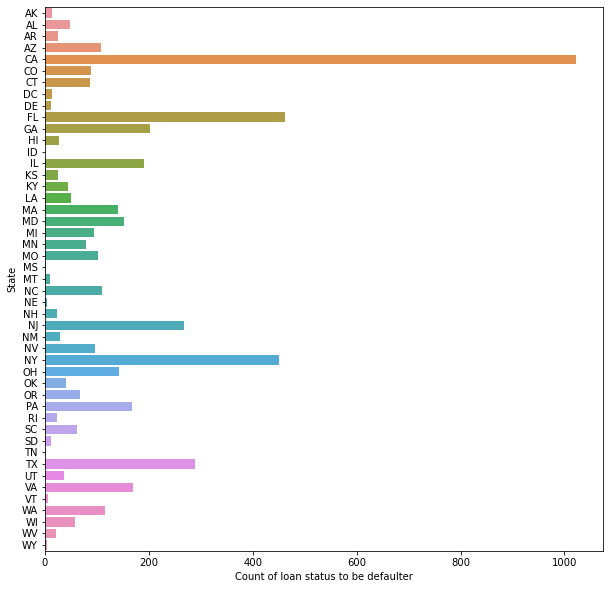

In [62]:
#plot of loan_status and addr_state
g = loan_data[loan_data['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=g)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('State')
plt.show()

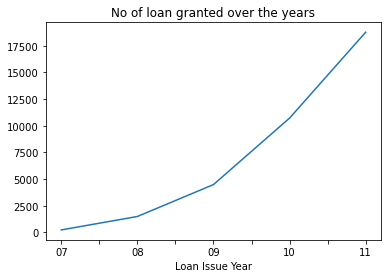

In [63]:
#plot of loan_status and issue_d_year
g = loan_data.groupby('issue_d_year')['loan_status'].count()
g.plot.line(x_compat=True)
plt.title('No of loan granted over the years')
plt.xlabel('Loan Issue Year')
plt.show()

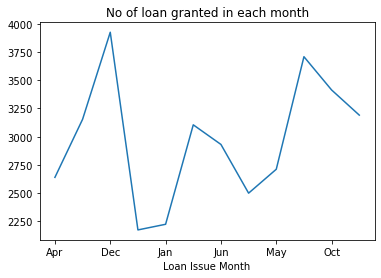

In [64]:
g = loan_data.groupby('issue_d_month')['loan_status'].count()
g.plot.line(x_compat=True)
plt.title('No of loan granted in each month')
plt.xlabel('Loan Issue Month')
plt.show()

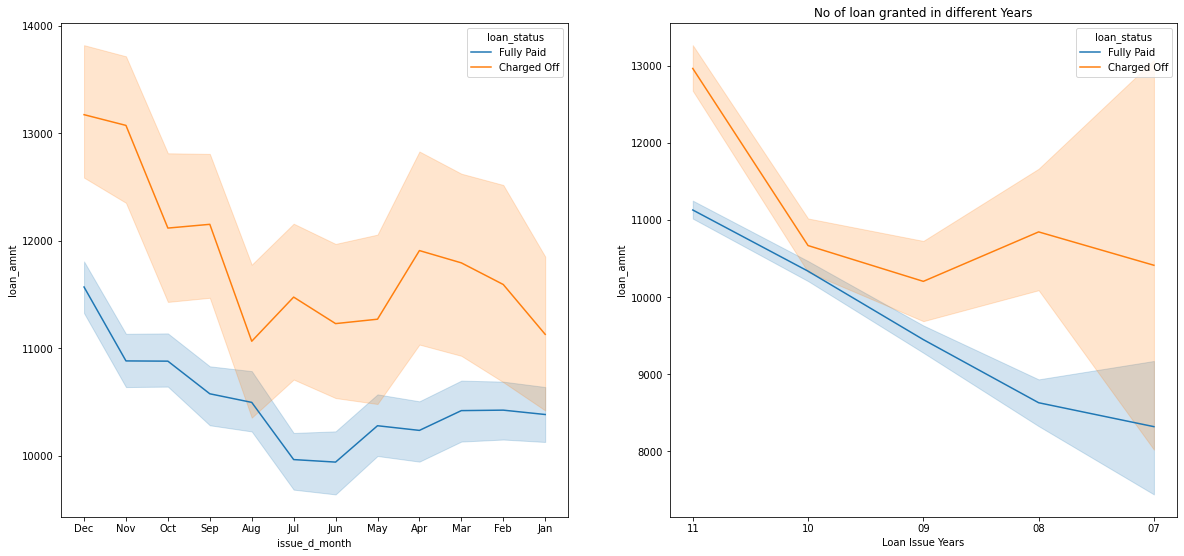

In [65]:
#plot of loan_status and issue_d_year and issue_d_month
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =loan_data,y='loan_amnt', x='issue_d_month', hue ='loan_status')
plt.subplot(222)
plt.title('No of loan granted in different months')
plt.xlabel('Loan Issue Month')
sns.lineplot(data =loan_data,y='loan_amnt', x='issue_d_year', hue ='loan_status')
plt.title('No of loan granted in different Years')
plt.xlabel('Loan Issue Years')
plt.show()


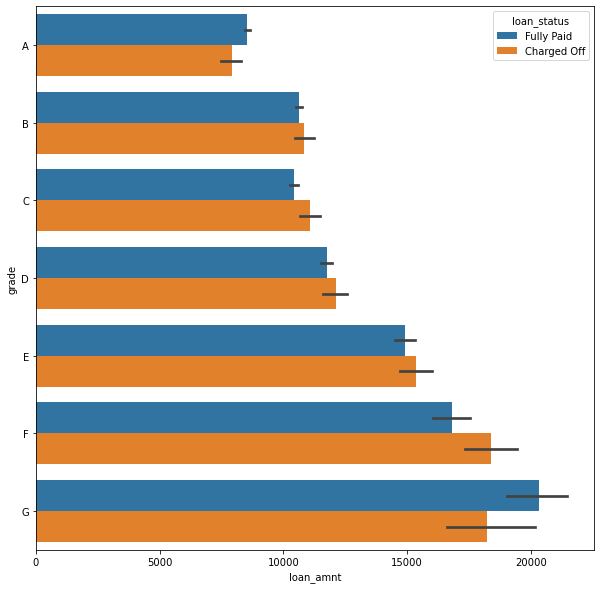

In [66]:
#plot of loan_amnt and grade
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt', y='grade', hue ='loan_status', order=['A','B','C','D','E','F','G'])
plt.show()

In [67]:
#Creating a subset of loan data for loan amount less than 7 Thousand
df_agg = loan_data[loan_data['funded_amnt'] <= 7000].groupby(['loan_status'])['funded_amnt'].count().reset_index()

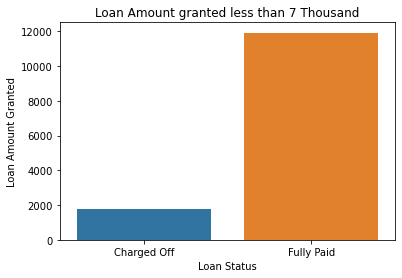

In [68]:
#plot of loan_status and funded_amnt less than 7 Thousand
sns.barplot(x='loan_status', y='funded_amnt', data=df_agg)
plt.title('Loan Amount granted less than 7 Thousand')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()

In [69]:
#Creating a subset of loan data for loan amount more than 7 Thousand
df_agg = loan_data[loan_data['funded_amnt'] > 7000].groupby(['loan_status'])['funded_amnt'].count().reset_index()

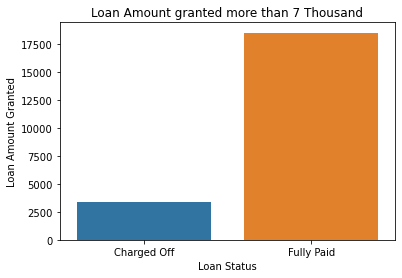

In [70]:
#plot of loan_status and funded_amnt above 7 Thousand
sns.barplot(x='loan_status', y='funded_amnt', data=df_agg)
plt.title('Loan Amount granted more than 7 Thousand')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()

# Observations Summary

### The above analysis with respect to the charged off loans for each variable suggests the following. There is a more probability of defaulting when : 

- Applicants having house_ownership as 'RENT'
- Applicants who receive interest at the rate of 13-17%
- Applicants who have an income of range 31000 - 58000
- Applicants with employement length of 10
- Term of 36 months
- When the loan status is Not verified
- When the purpose is 'debt_consolidation'

